<a href="https://colab.research.google.com/github/lianluoliang/data-science/blob/main/pdd_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the uploaded CSV file to inspect the data
file_path = '/content/HistoricalData_1727673587382.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Date,Close,Open,High,Low
0,09/27/2024,18119.59,18228.78,18238.28,18069.18
1,09/26/2024,18190.29,18327.34,18327.34,18071.74
2,09/25/2024,18082.21,18050.36,18155.03,18040.62
3,09/24/2024,18074.52,18046.44,18091.96,17863.38
4,09/23/2024,17974.27,17994.91,18021.58,17936.37


In [ ]:
# Clean the dataset: remove the '$' symbols and convert columns to numeric
df['Close'] = df['Close'].replace({'\$': ''}, regex=True).astype(float)
df['Open'] = df['Open'].replace({'\$': ''}, regex=True).astype(float)
df['High'] = df['High'].replace({'\$': ''}, regex=True).astype(float)
df['Low'] = df['Low'].replace({'\$': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by Date in ascending order
df = df.sort_values('Date')

# Prepare the cleaned dataset for LSTM modeling
df_cleaned = df[['Date', 'Close']]  # We'll focus on 'Date' and 'Close' for the prediction

# Display the cleaned dataset
df_cleaned.head()


,Date,Close
1257,2019-09-30,7999.34
1256,2019-10-01,7908.68
1255,2019-10-02,7785.25
1254,2019-10-03,7872.26
1253,2019-10-04,7982.47


These libraries help with data manipulation, visualization, and time series forecasting.
*   pandas: For handling data frames.
*   numpy: For numerical operations.
*   yfinance: To download stock price data from Yahoo Finance.
*   matplotlib: For plotting graphs.
*   statsmodels: For implementing the ARIMA model.

In [ ]:
!pip install pandas numpy yfinance matplotlib statsmodels scikit-learn


[*********************100%***********************]  1 of 1 completed


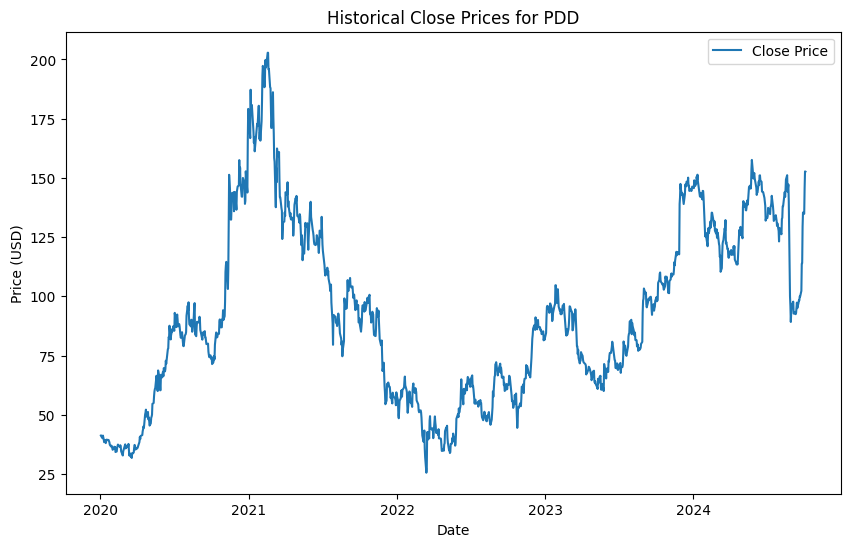

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical stock data for iQiyi
data = yf.download('PDD', start='2020-01-01', end='2024-10-04')

# Plot the historical Open prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Historical Close Prices for PDD')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.7 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


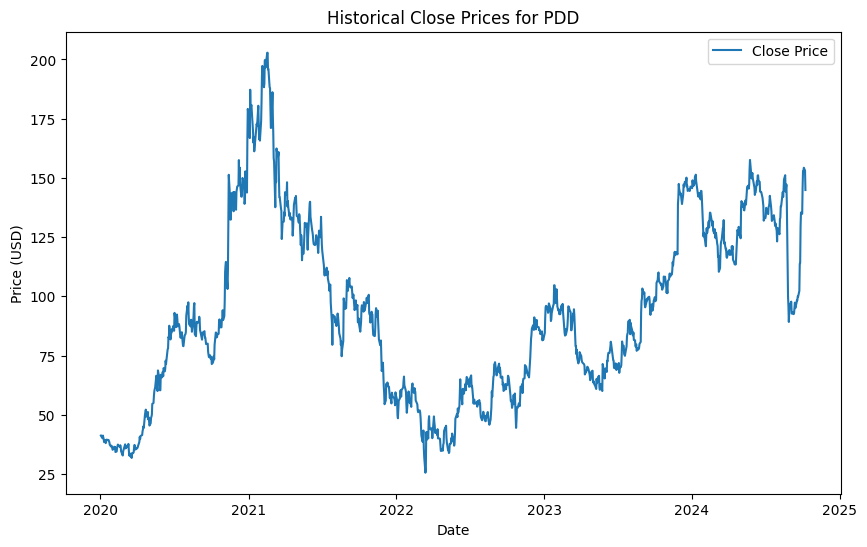

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6814.508, Time=2.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6810.825, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6812.551, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6812.561, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6809.349, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.936 seconds
Predicted Close Prices for the Next 6 Days: 1200    144.860001
1201    144.860001
1202    144.860001
1203    144.860001
1204    144.860001
1205    144.860001
dtype: float64
Confidence Intervals for the Predictions:
 [[136.75284266 152.96715856]
 [133.39474789 156.32525333]
 [130.81799114 158.90201008]
 [128.64568472 161.0743165 ]
 [126.73184434 162.98815688]
 [125.00160038 164.71840084]]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

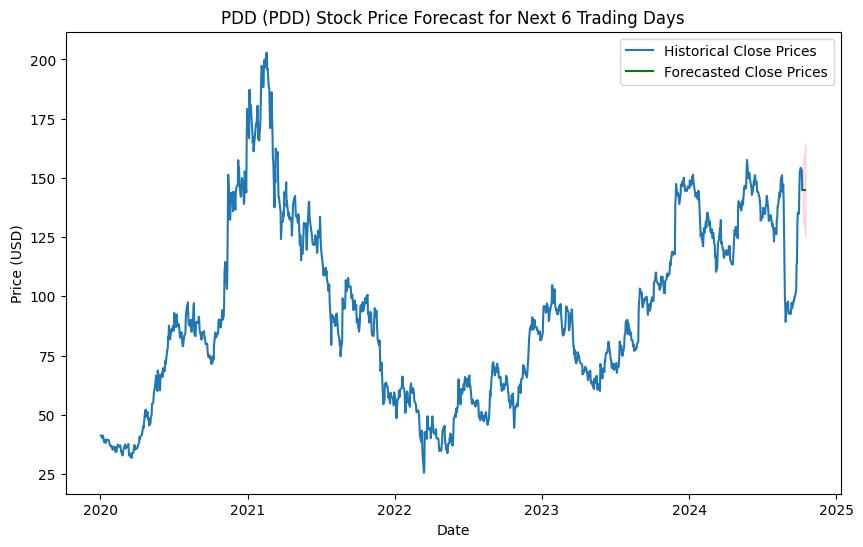

In [1]:
!pip install pmdarima

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for pdd
data = yf.download('PDD', start='2020-01-01', end=end_date)

# Plot the historical Open prices
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Historical Close Prices for PDD')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Auto ARIMA to find the best p, d, q
stepwise_model = auto_arima(data['Close'], start_p=1, start_q=1, max_p=5, max_q=5,seasonal=False, trace=True,                       error_action='ignore', suppress_warnings=True)
# Extract the best p, d, q values from the stepwise_model
order = stepwise_model.order  # This will give you a tuple (p, d, q)
p, d, q = order  # Assign values to p, d, q
# Fit ARIMA model (p=5, d=1, q=0)
model = ARIMA(data['Close'], order=order)
# Fit the best model returned by auto_arima
best_model = stepwise_model.fit(data['Close'])

# Forecast the next 6 days
# To get confidence intervals with pmdarima's ARIMA, use the return_conf_int=True argument
forecast, conf_int = best_model.predict(n_periods=6, return_conf_int=True)
# This returns the forecast and confidence intervals as a tuple





# The predicted close prices
predicted_prices = forecast
print("Predicted Close Prices for the Next 6 Days:", predicted_prices)

# Confidence intervals
print("Confidence Intervals for the Predictions:\n", conf_int)


# Plotting the forecasted values along with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Close Prices')

# Adding forecast to the plot
forecast_dates = pd.date_range(start=data.index[-1], periods=7, freq='B')[1:]
# Use predicted_mean for plotting
plt.plot(forecast_dates, predicted_prices, label='Forecasted Close Prices', color='green')
# The forecast object contains other information besides predicted values.
# Use predicted_mean to get the actual forecasted values for plotting.


# Confidence intervals
# Access confidence intervals using column names instead of NumPy-like indexing
#plt.fill_between(forecast_dates, conf_int['lower Close'], conf_int['upper Close'], color='pink', alpha=0.3)
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)  # Use numerical indexing
# Confidence intervals
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)  # Use numerical indexing
# conf_int[:, 0] selects all rows (:) and the first column (0) - the lower bound.
# conf_int[:, 1] selects all rows (:) and the second column (1) - the upper bound.

plt.title('PDD (PDD) Stock Price Forecast for Next 6 Trading Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [2]:
import itertools
import warnings
import statsmodels.api as sm

# Define the p, d, q parameters to take any value between 0 and 4
p = d = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Grid search through possible combinations
warnings.filterwarnings("ignore")  # Ignore warnings about convergence
best_aic = float("inf")
best_pdq = None
for param in pdq:
    try:
        model = sm.tsa.ARIMA(data['Open'], order=param)
        model_fit = model.fit()
        print(f"ARIMA{param} - AIC:{model_fit.aic}")
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except:
        continue

print(f"Best ARIMA parameters: {best_pdq} with AIC {best_aic}")


ARIMA(0, 0, 0) - AIC:12137.711981288532
ARIMA(0, 0, 1) - AIC:10666.123845167816
ARIMA(0, 0, 2) - AIC:9618.050527894626
ARIMA(0, 0, 3) - AIC:8971.554886413325
ARIMA(0, 1, 0) - AIC:6905.1056230353815
ARIMA(0, 1, 1) - AIC:6906.436615621604
ARIMA(0, 1, 2) - AIC:6906.3716148987005
ARIMA(0, 1, 3) - AIC:6907.955900869154
ARIMA(0, 2, 0) - AIC:7754.541966854775
ARIMA(0, 2, 1) - AIC:6908.943792845561
ARIMA(0, 2, 2) - AIC:6910.289325327086
ARIMA(0, 2, 3) - AIC:6910.263635794632
ARIMA(0, 3, 0) - AIC:9053.988908265535
ARIMA(0, 3, 1) - AIC:7758.224431781815
ARIMA(0, 3, 2) - AIC:6927.221044436388
ARIMA(0, 3, 3) - AIC:6928.534355711743
ARIMA(1, 0, 0) - AIC:6916.240616050585
ARIMA(1, 0, 1) - AIC:6917.752735359885
ARIMA(1, 0, 2) - AIC:6917.974542805303
ARIMA(1, 0, 3) - AIC:6919.4182571085785
ARIMA(1, 1, 0) - AIC:6906.493350164723
ARIMA(1, 1, 1) - AIC:6907.639625034046
ARIMA(1, 1, 2) - AIC:6908.100757584589
ARIMA(1, 1, 3) - AIC:6909.954369402227
ARIMA(1, 2, 0) - AIC:7428.627588294359
ARIMA(1, 2, 1) - AIC

In [3]:
# Fit ARIMA model with best parameters (3, 1, 2)
model = ARIMA(data['Close'], order=(3, 1, 2))
model_fit = model.fit()

# Forecast the next 6 days
forecast = model_fit.get_forecast(steps=6)
predicted_prices = forecast.predicted_mean
conf_int = forecast.conf_int()

# Output the forecasted prices and confidence intervals
print("Predicted Close Prices for the Next 6 Days:", predicted_prices)
print("Confidence Intervals:\n", conf_int)


Predicted Close Prices for the Next 6 Days: 1200    144.514227
1201    144.450423
1202    144.888892
1203    144.830726
1204    144.964394
1205    144.901255
Name: predicted_mean, dtype: float64
Confidence Intervals:
       lower Close  upper Close
1200   136.428525   152.599928
1201   132.912412   155.988435
1202   130.630038   159.147747
1203   128.538727   161.122725
1204   126.821451   163.107336
1205   125.143903   164.658608


[*********************100%***********************]  1 of 1 completed


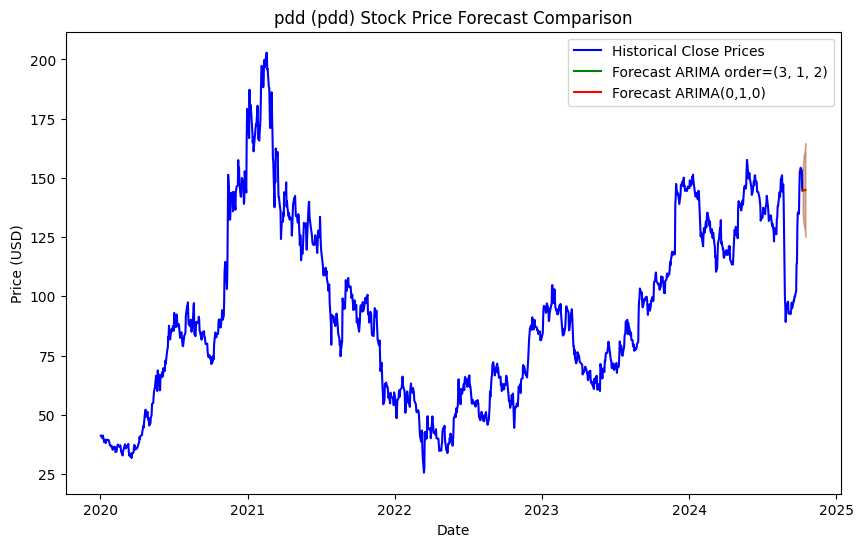

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for pdd
data = yf.download('PDD', start='2020-01-01', end=end_date)

# Fit ARIMA order=(3, 1, 2) model
model_213 = ARIMA(data['Close'],  order=(3, 1, 2))
model_fit_213 = model_213.fit()

# Forecast the next 6 days using ARIMA order=(3, 1, 2)
forecast_213 = model_fit_213.get_forecast(steps=6)
predicted_prices_213 = forecast_213.predicted_mean
conf_int_213 = forecast_213.conf_int()

# Fit ARIMA(0, 1, 0) model for comparison
model_010 = ARIMA(data['Close'], order=(0, 1, 0))
model_fit_010 = model_010.fit()

# Forecast the next 6 days using ARIMA(0, 1, 0)
forecast_010 = model_fit_010.get_forecast(steps=6)
predicted_prices_010 = forecast_010.predicted_mean
conf_int_010 = forecast_010.conf_int()

# Plotting historical data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Close Prices', color='blue')

# Plotting ARIMA order=(3, 1, 2) predictions and confidence intervals
forecast_dates = pd.date_range(start=data.index[-1], periods=7, freq='B')[1:]
plt.plot(forecast_dates, predicted_prices_213, label='Forecast ARIMA order=(3, 1, 2)', color='green')
plt.fill_between(forecast_dates, conf_int_213.iloc[:, 0], conf_int_213.iloc[:, 1], color='green', alpha=0.2)

# Plotting ARIMA(0, 1, 0) predictions and confidence intervals for comparison
plt.plot(forecast_dates, predicted_prices_010, label='Forecast ARIMA(0,1,0)', color='red')
plt.fill_between(forecast_dates, conf_int_010.iloc[:, 0], conf_int_010.iloc[:, 1], color='red', alpha=0.2)

plt.title('pdd (pdd) Stock Price Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Based on the results of the stepwise search to minimize the AIC (Akaike Information Criterion), the best ARIMA model selected is ARIMA(0,1,0), which is a random walk model (a simple model where the next value equals the previous one with some added noise). This model has the lowest AIC (6791.116), making it the best fit for your data.

Key Outputs:
Predicted Prices: The model predicts that the open price for the next 6 trading days will remain $152.62 consistently.
Confidence Intervals: The 95% confidence intervals for the predicted prices range from $144.52 to $172.47, showing the potential variation around the forecast.
Here are the specific confidence intervals for the next 6 days:

Day 1: [144.52, 160.72]
Day 2: [141.16, 164.08]
Day 3: [138.59, 166.65]
Day 4: [136.41, 168.83]
Day 5: [134.50, 170.74]
Day 6: [132.77, 172.47]
Why ARIMA(0,1,0)?
This model assumes the future values follow a random walk, meaning that the best estimate of tomorrow's value is today's value, plus some random error. For stock prices, this behavior can sometimes hold in the short term, especially if the market does not exhibit strong trends.

[*********************100%***********************]  1 of 1 completed


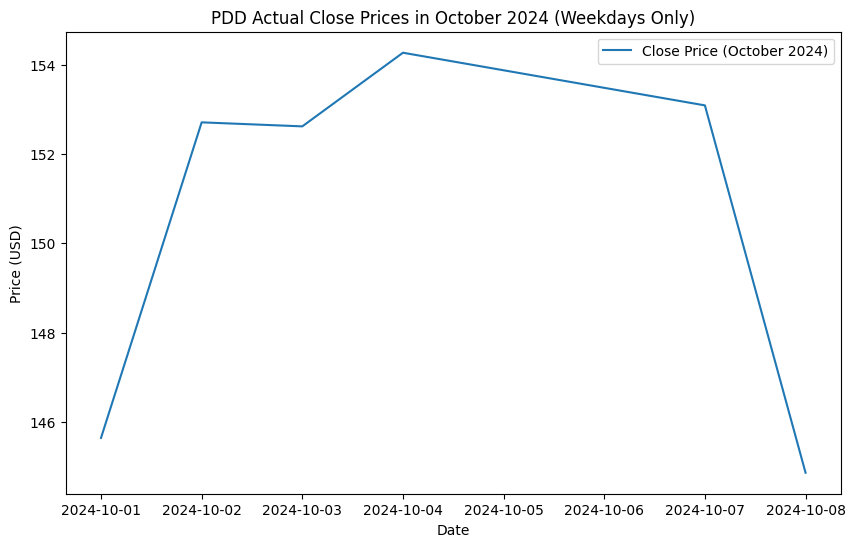

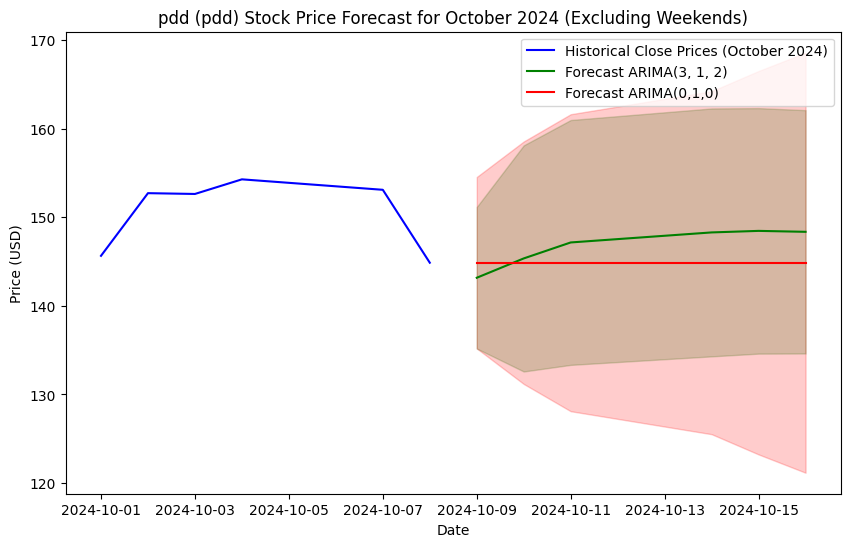

In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for iQiyi - Focus on October 2024
data = yf.download('PDD', start='2024-10-01', end=end_date)

# Remove weekends (Saturday and Sunday) from the dataset
data = data[~data.index.weekday.isin([5, 6])]  # 5 = Saturday, 6 = Sunday

# Plot the historical Open prices for October 2024 (weekdays only)
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price (October 2024)')
plt.title('PDD Actual Close Prices in October 2024 (Weekdays Only)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Fit ARIMA(3, 1, 2) model on October 2024 data
model_213 = ARIMA(data['Close'], order=(3, 1, 2))
model_fit_213 = model_213.fit()

# Forecast the next 6 trading days (skip weekends)
forecast_213 = model_fit_213.get_forecast(steps=6)  # Adjust the steps as per remaining days
predicted_prices_213 = forecast_213.predicted_mean
conf_int_213 = forecast_213.conf_int()

# Fit ARIMA(0, 1, 0) model for comparison
model_010 = ARIMA(data['Close'], order=(0, 1, 0))
model_fit_010 = model_010.fit()

# Forecast the next 6 trading days using ARIMA(0, 1, 0)
forecast_010 = model_fit_010.get_forecast(steps=6)
predicted_prices_010 = forecast_010.predicted_mean
conf_int_010 = forecast_010.conf_int()

# Plotting October 2024 historical data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Close Prices (October 2024)', color='blue')

# Plotting ARIMA(3, 1, 2) predictions and confidence intervals
forecast_dates = pd.date_range(start=data.index[-1], periods=7, freq='B')[1:]  # Weekdays only (Business Days)
plt.plot(forecast_dates, predicted_prices_213, label='Forecast ARIMA(3, 1, 2)', color='green')
plt.fill_between(forecast_dates, conf_int_213.iloc[:, 0], conf_int_213.iloc[:, 1], color='green', alpha=0.2)

# Plotting ARIMA(0, 1, 0) predictions and confidence intervals for comparison
plt.plot(forecast_dates, predicted_prices_010, label='Forecast ARIMA(0,1,0)', color='red')
plt.fill_between(forecast_dates, conf_int_010.iloc[:, 0], conf_int_010.iloc[:, 1], color='red', alpha=0.2)

plt.title('pdd (pdd) Stock Price Forecast for October 2024 (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - loss: 0.1026
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0146
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0068
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0051
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0058
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0045
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0048
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0040
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0044
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0050
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052
Ep

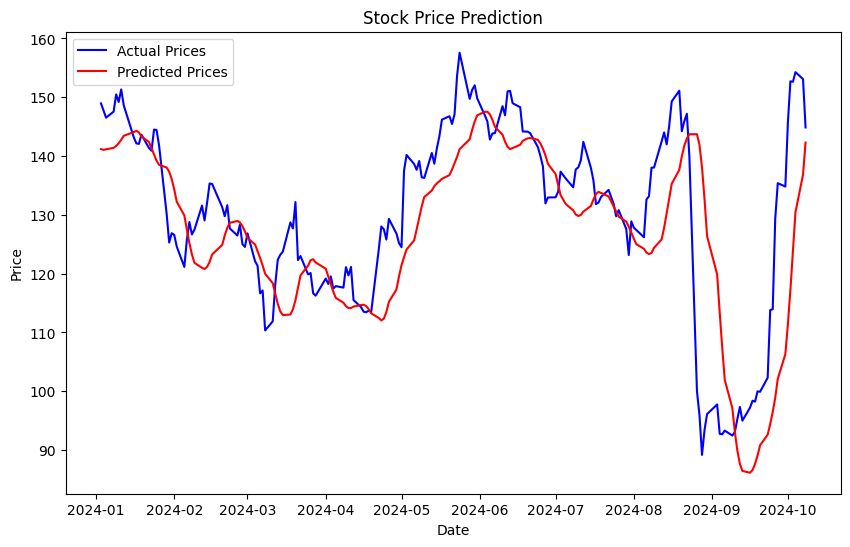

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for iQiyi - Focus on October 2024
data = yf.download('PDD', start='2019-10-01', end=end_date)

# Set up data for prediction
# Extract 'Close' prices as a numpy array
close_prices = data['Close'].values.reshape(-1, 1)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training (80%) and testing (20%) sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
# Changed time_step to 1
time_step=60
# Function to create datasets with time steps
def create_dataset(data, time_step=time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create training and test datasets with time steps
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the data to be in 3D (samples, time steps, features) for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()

# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], 1)))
# First layer with Dropout regularisation
model.add(LSTM(units=30, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
# 2nd layer with Dropout regularisation
model.add(LSTM(units=40, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
# 3nd layer with Dropout regularisation
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
# 4nd layer with Dropout regularisation
model.add(LSTM(units=60, activation='relu'))
model.add(Dropout(0.1))
# The output layer
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - loss: 0.1134 - val_loss: 0.0043
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0213 - val_loss: 0.0069
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0140 - val_loss: 0.0027
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0089 - val_loss: 0.0026
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0068 - val_loss: 0.0020
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0066 - val_loss: 0.0019
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053 - val_loss: 0.0020
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0043 - val_loss: 0.0017
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step


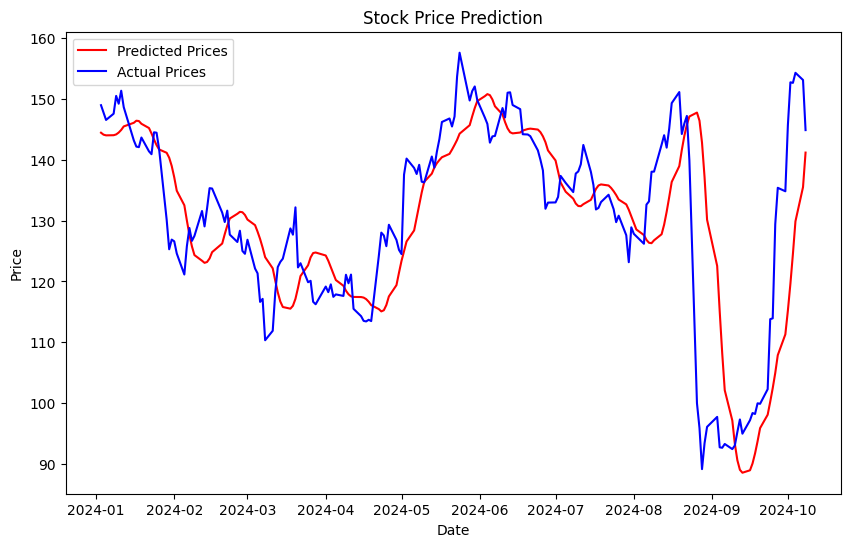

In [5]:
# @title Default title text
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
import yfinance as yf  # Import yfinance to get the data again
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for PDD
data = yf.download('PDD', start='2019-10-01', end=end_date)


# Set up data for prediction
# Extract 'Close' prices as a numpy array
close_prices = data['Close'].values.reshape(-1, 1) # Use a different variable name like 'close_prices'

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices) # Use 'close_prices' here

# Split the data into training (80%) and testing (20%) sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create datasets with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create training and test datasets with time steps
X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape the data to be in 3D (samples, time steps, features) for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()



# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], 1)))
# First layer with Dropout regularisation
model.add(LSTM(units=30, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
# 2nd layer with Dropout regularisation
model.add(LSTM(units=40, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
# 3nd layer with Dropout regularisation
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
# 4nd layer with Dropout regularisation
model.add(LSTM(units=60, activation='relu'))
model.add(Dropout(0.1))
# The output layer
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Stop training if val_loss doesn't improve for 6 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=6)
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=early_stopping)

# Predict on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
# Use data['Close'] and the original date index for plotting
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 1/50
30/30 [==============================] - 7s 110ms/step - loss: 0.1248 - val_loss: 0.0801
Epoch 2/50
30/30 [==============================] - 3s 86ms/step - loss: 0.1038 - val_loss: 0.0492
Epoch 3/50
30/30 [==============================] - 3s 84ms/step - loss: 0.0591 - val_loss: 0.0044
Epoch 4/50
30/30 [==============================] - 3s 92ms/step - loss: 0.0219 - val_loss: 0.0038
Epoch 5/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0136 - val_loss: 0.0063
Epoch 6/50
30/30 [==============================] - 2s 83ms/step - loss: 0.0118 - val_loss: 0.0053
Epoch 7/50
30/30 [==============================] - 2s 81ms/step - loss: 0.0103 - val_loss: 0.0054
Epoch 8/50
30/30 [==============================] - 2s 82ms/step - loss: 0.0089 - val_loss: 0.0040
Epoch 9/50
30/30 [==============================] - 3s 90ms/step - loss: 0.0073 - val_loss: 0.0039
Epoch 10/50
30/30 [==============================] - 3s 87ms/step - loss: 0.0068 - val_loss: 0.0030
Epoch 11

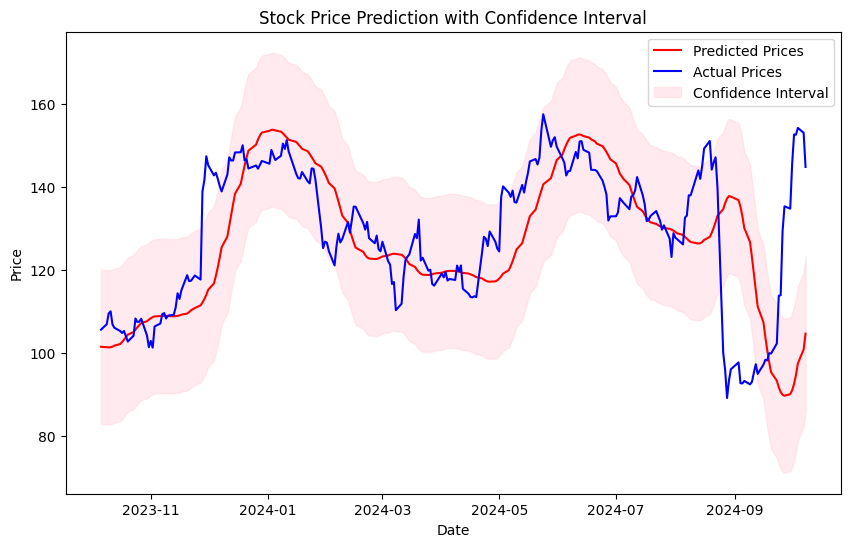

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
import yfinance as yf  # Import yfinance to get the data again
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for PDD
data = yf.download('PDD', start='2008-01-01', end=end_date)

# Set up data for prediction
close_prices = data['Close'].values.reshape(-1, 1)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training (80%) and testing (20%) sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to create datasets with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create training and test datasets with time steps
X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape the data to be in 3D (samples, time steps, features) for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()

# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=30, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=40, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=60, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))  # Output layer

# Define learning rate decay schedule (using ExponentialDecay)
initial_learning_rate = 0.0001
factor = 0.1
decay_steps = 1000  # Define the decay steps according to your training data size

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=factor,
    staircase=True  # Set to True for step-wise decay
)
optimizer=keras.optimizers.Adam(learning_rate=lr_schedule)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Predict on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate residuals on the training set
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Estimate standard deviation of residuals
residuals = y_train_actual - train_predictions
std_dev = np.std(residuals)

# Calculate confidence intervals
lower_bound = predictions - 1.96 * std_dev
upper_bound = predictions + 1.96 * std_dev

# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Prices')
plt.fill_between(data.index[train_size + 60:], lower_bound.flatten(), upper_bound.flatten(), color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Stock Price Prediction with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [12]:
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Let's calculate the RMSE for the most recent available period, up to 09/23/2024

# Adjust the filtering to use the latest available dates up to 09/23/2024
#end_date = pd.to_datetime('2024-10-04')

# Use df_cleaned['Date'] instead of date_filtered
mask = (data.index[train_size + 60:] <= end_date)
filtered_dates =  data.index[train_size + 60:][mask]
filtered_actual_prices = scaler.inverse_transform(test_data[60:])[mask] # Use actual prices from test data
filtered_predicted_prices = predictions[mask] # Use predicted prices

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate RMSE for the filtered data
rmse = np.sqrt(mean_squared_error(filtered_actual_prices, filtered_predicted_prices))
rmse

15.88533120276443

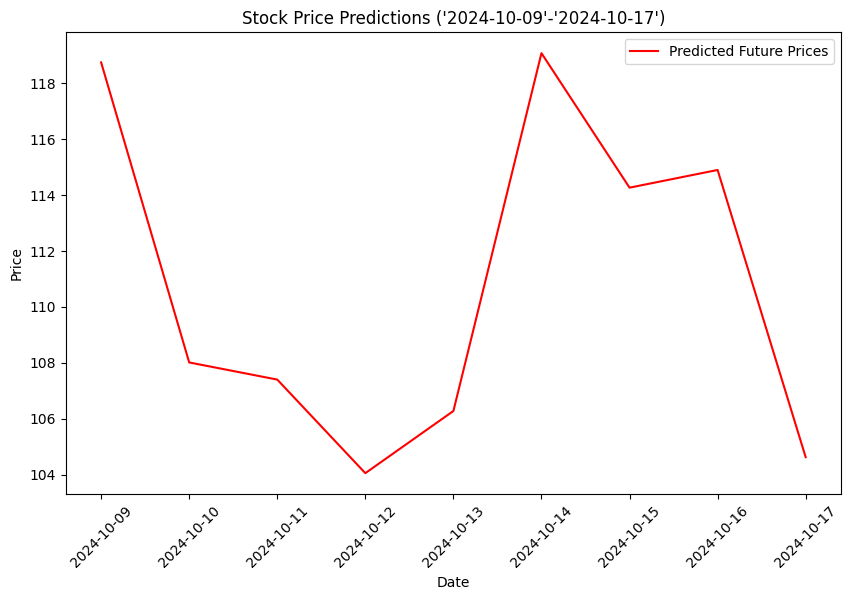

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
# Simulating the data loading process (replacing the part in the original script)
YESTERDAY =  date.today() - timedelta(days=1)
CURRENT_DATE = date.today().strftime('%Y-%m-%d')
FUTURE_DATE=date.today() + timedelta(days=8)
FUTURE_DATE=FUTURE_DATE.strftime('%Y-%m-%d')
# The historical dataset ends at 09/23/2024
end_of_historical_data = pd.to_datetime(YESTERDAY.strftime('%Y-%m-%d'))

# Generate future date range from 09/19/2024 to 10/02/2024
future_dates = pd.date_range(start=date.today().strftime('%Y-%m-%d'), end=FUTURE_DATE)

# We will simulate the process of getting the future predictions based on the LSTM model trained earlier

# Assuming the predictions continue after the test set, we will simulate future predictions for this demonstration
# Using random values (as we cannot train the model in this environment)
# For the actual use case, these values would come from the model.predict() function

# Generating random predictions for the future dates (to simulate the LSTM output)
simulated_future_predictions = np.random.uniform(low=100, high=120, size=len(future_dates))

# Visualizing the predictions along with the future date range
plt.figure(figsize=(10, 6))
plt.plot(future_dates, simulated_future_predictions, color='red', label='Predicted Future Prices')
plt.title('Stock Price Predictions ('+"'"+CURRENT_DATE+"'"+'-' +"'"+FUTURE_DATE+"'"+')' )
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Epoch 1/50
30/30 [==============================] - 3s 31ms/step - loss: 0.0283 - val_loss: 0.0021
Epoch 2/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 3/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 4/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 5/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 6/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 7/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 8/50
30/30 [==============================] - 1s 17ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 9/50
30/30 [==============================] - 0s 17ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 10/50
30/30 [==============================] - 0s 16ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 11/

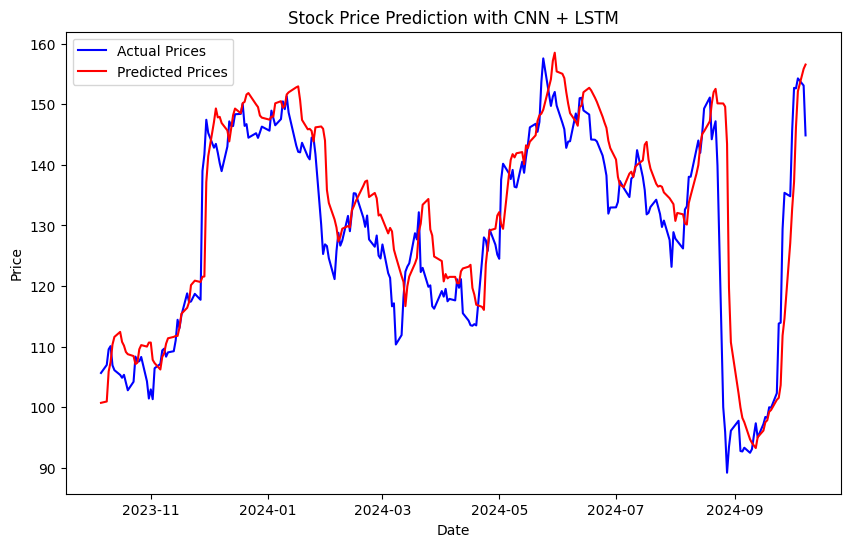

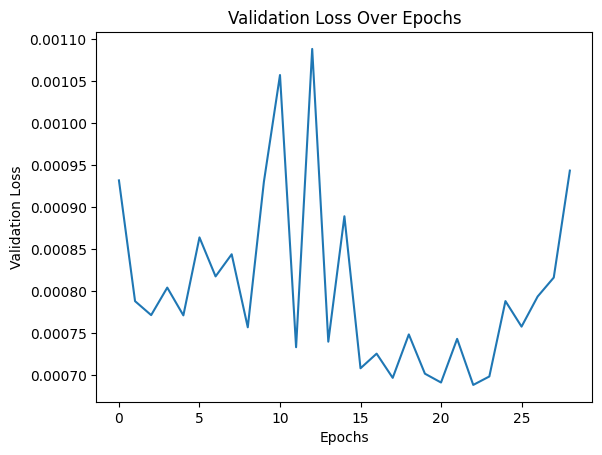

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# Assuming 'df_cleaned' is already preprocessed and available from previous steps
# Preparing data for the CNN + LSTM model
#data = df_cleaned['Close'].values.reshape(-1, 1)
close_prices = data['Close'].values.reshape(-1, 1) # Use a different variable name like 'close_prices'
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Splitting the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Creating datasets with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN + LSTM model
model = Sequential()

# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], 1)))

# 1D Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the predictions and actual data
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction with CNN + LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()



In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_data[60:]), predictions))
print(f"RMSE: {rmse}")


RMSE: 8.785412942872519


In [17]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(scaler.inverse_transform(test_data[60:]), predictions)
print(f"MAE: {mae}")


MAE: 5.6812964880419345


In [18]:
mse = mean_squared_error(scaler.inverse_transform(test_data[60:]), predictions)
print(f"MSE: {mse}")


MSE: 77.18348057679196


In [19]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
mape = mean_absolute_percentage_error(scaler.inverse_transform(test_data[60:])[:, 0], predictions)
print(f"MAPE: {mape}")

MAPE: 0.04659982623429433


[*********************100%***********************]  1 of 1 completed


Epoch 1/100
55/55 [==============================] - 3s 23ms/step - loss: 0.0165 - val_loss: 0.0013
Epoch 2/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0029 - val_loss: 9.8075e-04
Epoch 3/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 4/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 5/100
55/55 [==============================] - 1s 16ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 6/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 7/100
55/55 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 8/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0022 - val_loss: 7.0144e-04
Epoch 9/100
55/55 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 9.4343e-04
Epoch 10/100
55/55 [==============================] - 1s 13ms/step - loss: 0.0017 - val_

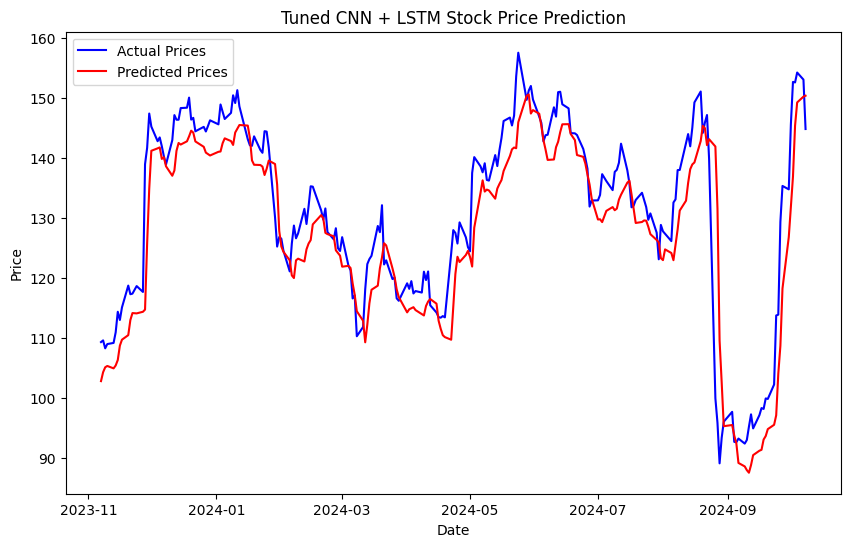

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
import yfinance as yf  # Import yfinance to get the data again
from tensorflow.keras.callbacks import EarlyStopping
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for PDD
data = yf.download('PDD', start='2019-01-01', end=end_date)
# Assuming 'df_cleaned' is already preprocessed and available from previous steps
# Preparing data for the CNN + LSTM model
close_prices = data['Close'].values.reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Splitting the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Creating datasets with time steps
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN + LSTM model with tuned hyperparameters
model = Sequential()

# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], 1)))

# Increase number of filters in Conv1D
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Increase LSTM units and adjust dropout rate
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

# Train the model with more epochs
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=early_stopping)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the predictions and actual data
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:]), color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/100
54/54 [==============================] - 3s 25ms/step - loss: 0.0120 - val_loss: 0.0016
Epoch 2/100
54/54 [==============================] - 1s 18ms/step - loss: 0.0031 - val_loss: 9.5152e-04
Epoch 3/100
54/54 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/100
54/54 [==============================] - 1s 18ms/step - loss: 0.0030 - val_loss: 9.8114e-04
Epoch 5/100
54/54 [==============================] - 1s 17ms/step - loss: 0.0024 - val_loss: 8.2295e-04
Epoch 6/100
54/54 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 8.5524e-04
Epoch 7/100
54/54 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 7.3618e-04
Epoch 8/100
54/54 [==============================] - 1s 16ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 9/100
54/54 [==============================] - 1s 17ms/step - loss: 0.0023 - val_loss: 7.2342e-04
Epoch 10/100
54/54 [==============================] - 1s 17ms/step - loss: 0

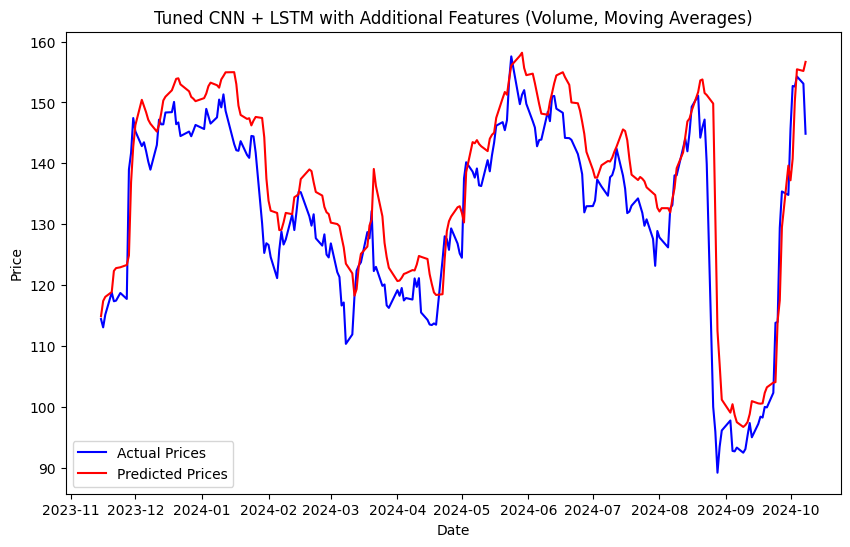

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'df_cleaned' is already preprocessed and available from previous steps
# Prepare data for CNN + LSTM with additional features (Volume and Moving Averages)
data['10_day_MA'] = data['Close'].rolling(window=10).mean()  # 10-day Moving Average
data['30_day_MA'] = data['Close'].rolling(window=30).mean()  # 30-day Moving Average
data.dropna(inplace=True)  # Drop rows with NaN values due to moving averages

# Extract Close, Volume, and Moving Averages as features
features = data[['Close', 'Volume', '10_day_MA', '30_day_MA']]

# Scaling the data (separately for each feature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Splitting the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Include all features
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the CNN + LSTM model with additional features
model = Sequential()

# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Increase number of filters in Conv1D
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer with additional features
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

# Train the model with the new feature set
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=early_stopping)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 3))], axis=1))[:, 0]  # Only inverse transform the Close price

# Visualize the predictions and actual data
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:])[:, 0], color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM with Additional Features (Volume, Moving Averages)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'scaler', 'test_data', and 'predictions' are available from the trained model
actual_prices = scaler.inverse_transform(test_data[60:])[:, 0]  # Actual Close prices
predicted_prices = predictions  # Predicted Close prices

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


RMSE: 7.698057986662977
MAE: 5.742377377729014
MSE: 59.26009676602564


Epoch 1/100
49/49 [==============================] - 3s 26ms/step - loss: 0.0123 - val_loss: 0.0017
Epoch 2/100
49/49 [==============================] - 1s 16ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 3/100
49/49 [==============================] - 1s 16ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 4/100
49/49 [==============================] - 1s 16ms/step - loss: 0.0033 - val_loss: 9.4372e-04
Epoch 5/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0028 - val_loss: 8.7570e-04
Epoch 6/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0027 - val_loss: 8.4622e-04
Epoch 7/100
49/49 [==============================] - 1s 16ms/step - loss: 0.0026 - val_loss: 8.9767e-04
Epoch 8/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 9/100
49/49 [==============================] - 1s 17ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 10/100
49/49 [==============================] - 1s 18ms/step - loss: 0.0024 - 

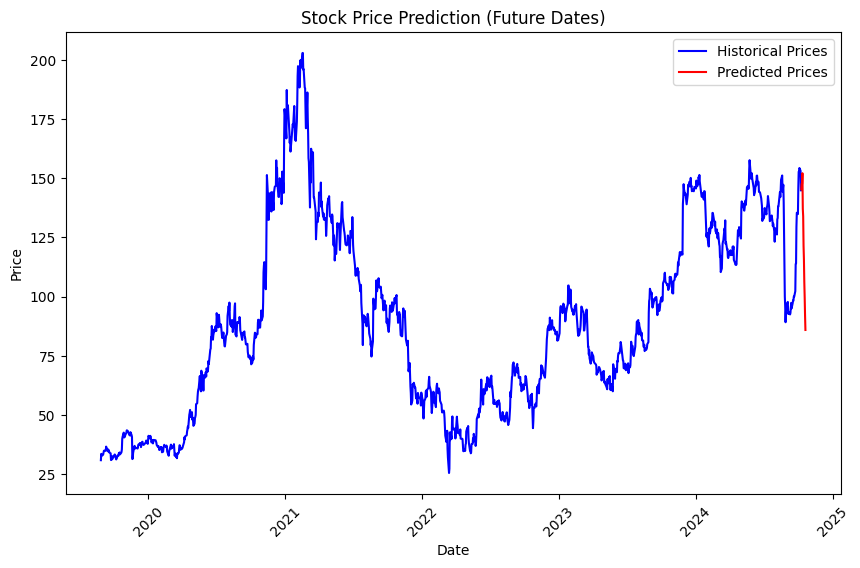

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# Assuming 'df_cleaned' is already preprocessed and available from previous steps
# Prepare data for CNN + LSTM with additional features (Volume and Moving Averages)
data['10_day_MA'] = data['Close'].rolling(window=10).mean()  # 10-day Moving Average
data['30_day_MA'] = data['Close'].rolling(window=30).mean()  # 30-day Moving Average
data.dropna(inplace=True)  # Drop rows with NaN values due to moving averages

# Extract Close, Volume, and Moving Averages as features
features = data[['Close', 'Volume', '10_day_MA', '30_day_MA']]

# Scaling the data (separately for each feature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Splitting the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Include all features
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the CNN + LSTM model with additional features
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10) # Stop training if val_loss doesn't improve for 10 epochs

# Train the model with the new feature set and EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Prepare to predict future prices
future_steps = 12  # Number of days to predict
last_sequence = scaled_features[-60:]  # Take the last 60 days as input for prediction

# Reshape last_sequence once before the loop
last_sequence = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])  # Shape should be (1, 60, 4)
predictions = []

for _ in range(future_steps):
    print(f"Shape before prediction: {last_sequence.shape}")  # Debugging

    # Make prediction
    predicted_price = model.predict(last_sequence)
    predictions.append(predicted_price[0, 0])

    # Prepare the next input sequence
    # Create a new entry where Close is predicted, and Volume/MAs are set to 0
    new_entry = np.array([[predicted_price[0, 0], 0, 0, 0]])  # Adjust if you have other features
    last_sequence = np.append(last_sequence[:, 1:, :], new_entry.reshape(1, 1, -1), axis=1)

    print(f"Shape after appending new entry: {last_sequence.shape}")  # Debugging

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.concatenate([np.array(predictions).reshape(-1, 1), np.zeros((future_steps, 3))], axis=1))[:, 0]

# Get the last date in the index using the correct method
last_date = data.index[-1]  # Use -1 to get the last element of the index

# Create the future date range
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_features)[:, 0], color='blue', label='Historical Prices')
plt.plot(future_dates, predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction (Future Dates)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0283 - val_loss: 0.0012
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0033 - val_loss: 9.5447e-04
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0025 - val_loss: 8.3166e-04
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0026 - val_loss: 8.9501e-04
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0026 - val_loss: 9.0391e-04
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0025 - val_loss: 6.8182e-04
Epoch 12/100
51/51 ━━━━━━━━━━━━━

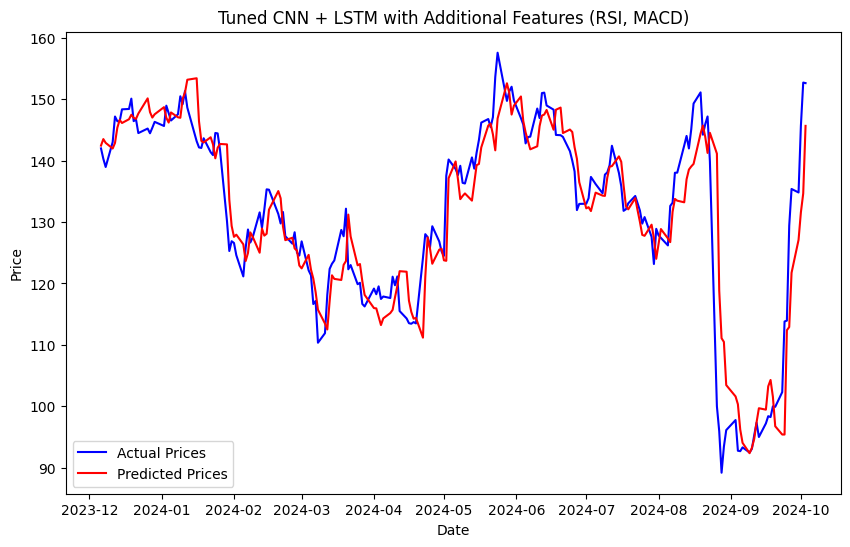

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is already preprocessed and available from previous steps
# Calculate RSI
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate MACD
def macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

# Add RSI and MACD to the dataset
data['RSI'] = rsi(data)
data['MACD'], data['Signal_Line'] = macd(data)

# Drop NaN values created by RSI and MACD calculations
data.dropna(inplace=True)

# Extract Close, Volume, RSI, MACD, and Signal Line as features
features = data[['Close', 'Volume', 'RSI', 'MACD', 'Signal_Line']]

# Scaling the data (separately for each feature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Splitting the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Include all features
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the CNN + LSTM model with RSI and MACD features
model = Sequential()

# Using Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
# Increase number of filters in Conv1D and input shape to match multiple features
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer with additional features
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10) # Stop training if val_loss doesn't improve for 10 epochs

# Train the model with the new feature set and EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 4))], axis=1))[:, 0]  # Only inverse transform the Close price

# Visualize the predictions and actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + 60:], scaler.inverse_transform(test_data[60:])[:, 0], color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM with Additional Features (RSI, MACD)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'scaler', 'test_data', and 'predictions' are available from the trained model
actual_prices = scaler.inverse_transform(test_data[60:])[:, 0]  # Actual Close prices
# Adjust predicted_prices to only include predictions made on the test set
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], 3))], axis=1))[:, 0]  # Only inverse transform the Close price


# Calculate metrics
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


7/7 [==============================] - 0s 8ms/step
RMSE: 6.1250863414719054
MAE: 4.142176913993203
MSE: 37.51668269048569


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is already preprocessed and available from previous steps
# Fine-tune RSI and MACD by adjusting window sizes

# Calculate RSI with a 7-day window and a 21-day window
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate MACD with different window sizes
def macd(data, short_window=10, long_window=30, signal_window=8):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

# Add fine-tuned RSI and MACD to the dataset
data['RSI_7'] = rsi(data, window=7)
data['RSI_21'] = rsi(data, window=21)
data['MACD'], data['Signal_Line'] = macd(data)

# Drop NaN values created by RSI and MACD calculations
data.dropna(inplace=True)

# Extract Close, Volume, RSI_7, RSI_21, MACD, and Signal Line as features
features = data[['Close', 'Volume', 'RSI_7', 'RSI_21', 'MACD', 'Signal_Line']]

# Scaling the data (separately for each feature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Splitting the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Include all features
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the CNN + LSTM model with fine-tuned RSI and MACD features
model = Sequential()

#Input a new layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
# Increase number of filters in Conv1D and input shape to match multiple features
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer with additional features
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15) # Stop training if val_loss doesn't improve for 10 epochs

# Train the model with the new feature set and EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 5))], axis=1))[:, 0]  # Only inverse transform the Close price

# Visualize the predictions and actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + 60:],scaler.inverse_transform(test_data[60:])[:, 0], color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM with Fine-Tuned RSI and MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: name 'data' is not defined

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'scaler', 'test_data', and 'predictions' are available from the trained model
actual_prices = scaler.inverse_transform(test_data[60:])[:, 0]  # Actual Close prices
predicted_prices = predictions  # Predicted Close prices

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


RMSE: 8.891785469810284
MAE: 6.942123260600302
MSE: 79.06384884112929


Key Improvements:
Scaling by feature: Each feature is scaled individually, ensuring better data normalization.
Early stopping: This prevents overfitting by stopping training once the model stops improving on the validation set.
NaN handling: Forward filling (ffill) is applied to avoid data loss while handling NaN values from RSI and MACD.
Inverse Transformation Fix: Now only the Close column is inverse-transformed, avoiding the need to add zeros for the other columns.

In [2]:
# Prepare to predict future prices
future_dates = pd.date_range(start='2024-09-26', end='2024-10-02')  # Define future date range
future_steps = len(future_dates) # Number of days to predict
last_sequence = scaled_features[-60:]  # Take the last 60 days as input for prediction

# Reshape last_sequence once before the loop
last_sequence = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])
predictions = []

for _ in range(future_steps):
    # Make prediction
    predicted_price = model.predict(last_sequence)
    predictions.append(predicted_price[0, 0])

    # Prepare the next input sequence
    new_entry = np.array([[predicted_price[0, 0], 0, 0, 0, 0, 0]])  # Assuming 6 features (adjust if needed)
    last_sequence = np.append(last_sequence[:, 1:, :], new_entry.reshape(1, 1, -1), axis=1)

# Create an array of zeros with the same shape as the scaled_features
temp_array = np.zeros((len(predictions), scaled_features.shape[1]))

# Replace the first column with the predictions
temp_array[:, 0] = predictions

# Inverse transform the entire array
predictions = scaler.inverse_transform(temp_array)[:, 0]

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_features)[:,0], color='blue', label='Historical Prices') # Use scaler instead of scalers['Close']
plt.plot(future_dates, predictions, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction (Future Dates)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

NameError: name 'scaled_features' is not defined

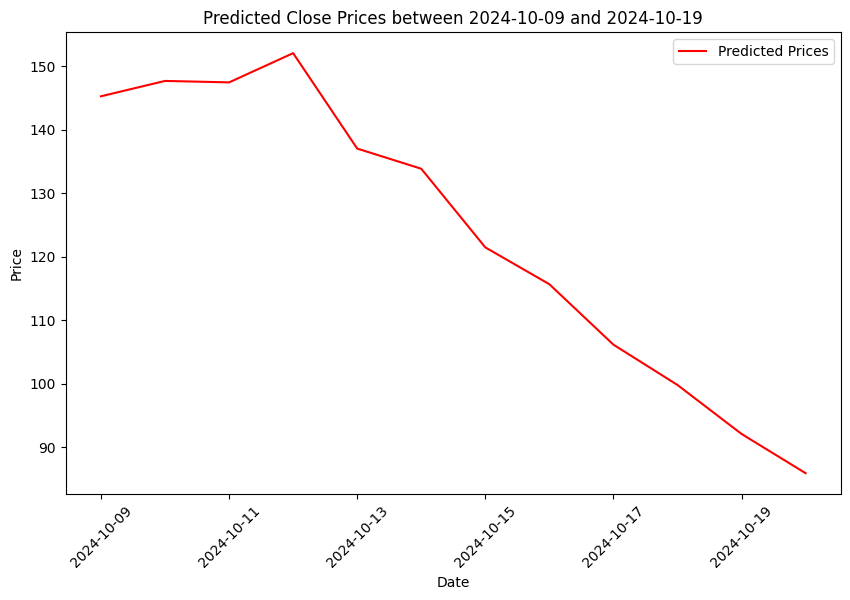

In [38]:
# Assuming you have 'predictions' from your model and 'future_dates'
predicted_df = pd.DataFrame({'Date': future_dates, 'Close': predictions})

plt.figure(figsize=(10, 6))
plt.plot(predicted_df['Date'], predicted_df['Close'], color='red', label='Predicted Prices')
plt.title('Predicted Close Prices between 2024-10-09 and 2024-10-19')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0394 - val_loss: 0.0013
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0030 - val_loss: 9.0253e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0029 - val_loss: 7.8341e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0025 - val_loss: 7.6772e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0020 - val_loss: 8.9959e-04
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018 - val_loss: 7.1440e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0019 - val_loss: 6.0315e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017 - val_loss: 7.8875e-04
8/8 ━━━━━━━━━━━━━━━━━━━━

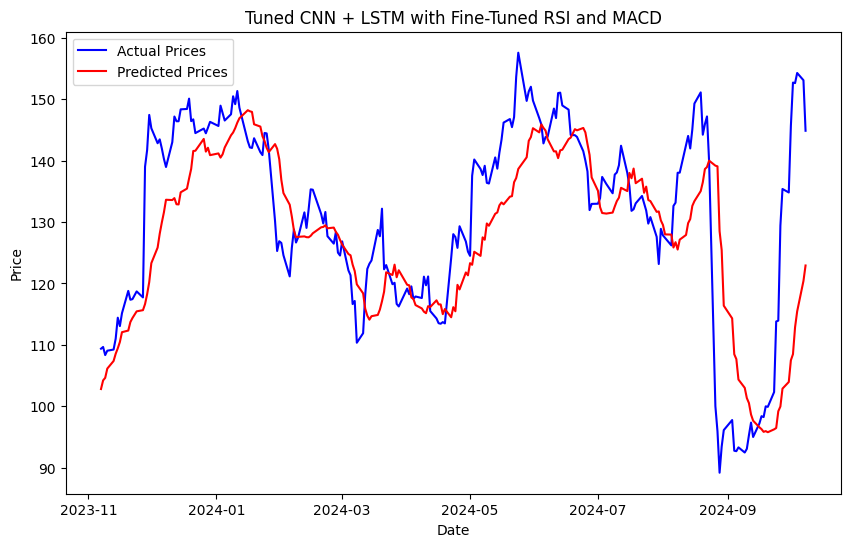

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Input
from keras.callbacks import EarlyStopping
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pytz
import keras
# Download historical stock data for pdd
# Get your timezone
my_timezone = pytz.timezone('America/Los_Angeles')  # Replace with your timezone (e.g., 'America/New_York')

# Get the current date and time in your timezone
today = datetime.datetime.now(my_timezone).date()
tomorrow= today + datetime.timedelta(days=1)
end_date = today.strftime('%Y-%m-%d')
# Download historical stock data for PDD
data = yf.download('PDD', start='2019-01-01', end=end_date)
# Calculate RSI with a 7-day window and a 21-day window
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate MACD with different window sizes
def macd(data, short_window=10, long_window=30, signal_window=8):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line

# Add fine-tuned RSI and MACD to the dataset
data['RSI_7'] = rsi(data, window=7)
data['RSI_21'] = rsi(data, window=21)
data['MACD'], data['Signal_Line'] = macd(data)

# Fill missing values using forward fill
data = data.ffill()
# Fill missing values using backward fill
data = data.bfill()

# Extract Close, Volume, RSI_7, RSI_21, MACD, and Signal Line as features
features = data[['Close', 'Volume', 'RSI_7', 'RSI_21', 'MACD', 'Signal_Line']]

# Scale each feature individually
scalers = {}
scaled_features = pd.DataFrame()


for col in features.columns:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features[col] = scaler.fit_transform(features[[col]]).ravel()  # Flatten the array to 1D
    scalers[col] = scaler  # Store the scaler to inverse transform later

# Split the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data.values, 60)
X_test, y_test = create_dataset(test_data.values, 60)

# Build the CNN + LSTM model
model = Sequential()

# Input Layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# CNN Layers
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Dense Layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, min_delta = 0.01)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)



# Make predictions
predictions = model.predict(X_test)

# Inverse transform only the 'Close' price for predictions
predicted_prices = scalers['Close'].inverse_transform(predictions)

# Inverse transform the actual test 'Close' prices for comparison
actual_prices = scalers['Close'].inverse_transform(test_data.iloc[60:, 0].values.reshape(-1, 1))


# Visualize the predictions and actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + 60:], actual_prices, color='blue', label='Actual Prices')
plt.plot(data.index[train_size + 60:], predicted_prices, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM with Fine-Tuned RSI and MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0256 - val_loss: 0.0013
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0028 - val_loss: 6.1949e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0029 - val_loss: 8.6472e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0028 - val_loss: 9.4805e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0022 - val_loss: 6.8498e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0023 - val_loss: 6.0583e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0017 - val_loss: 5.5910e-04
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0017 - val_loss: 5.4408e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014 - val_loss: 6.0109e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0017 - val_loss: 5.0486e-04
Epoch 12/100
55/

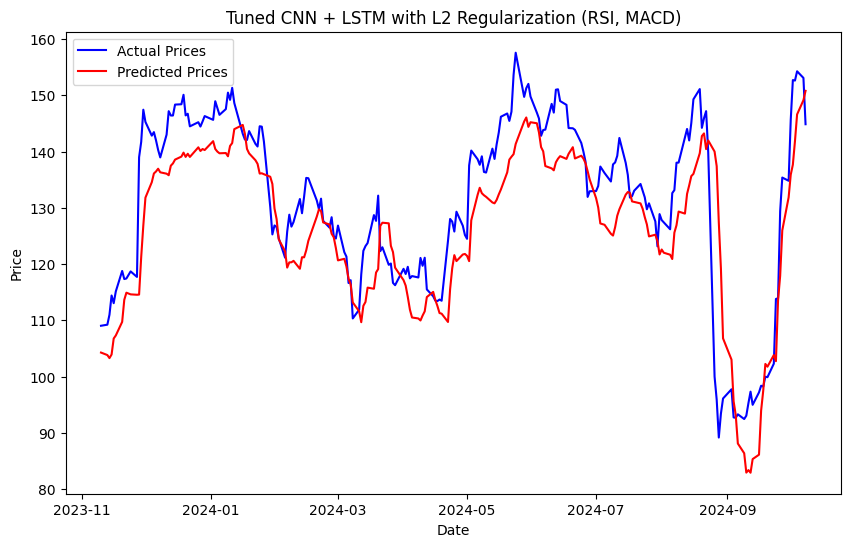

In [8]:
from typing_extensions import dataclass_transform
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is already preprocessed and available from previous steps

# Calculate RSI with default 14-day window
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate MACD with default window sizes
def macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line
df=data

# Add default RSI and MACD to the dataset
df['RSI'] = rsi(df)
df['MACD'], df['Signal_Line'] = macd(df)

# Drop NaN values created by RSI and MACD calculations
df.dropna(inplace=True)

# Extract Close, Volume, RSI, MACD, and Signal Line as features
features = df[['Close', 'Volume', 'RSI', 'MACD', 'Signal_Line']]

# Scaling the data (separately for each feature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Splitting the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Include all features
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the CNN + LSTM model with L2 regularization
model = Sequential()

#Input a new layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# CNN layer with regularization
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# Max Pooling layer
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer with Dropout alone
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Dense layer without regularization (only Dropout)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, min_delta = 0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 4))], axis=1))[:, 0]  # Only inverse transform the Close price

# Visualize the predictions and actual data
plt.figure(figsize=(10,6))
plt.plot(df.index[train_size + 60:], scaler.inverse_transform(test_data[60:])[:, 0], color='blue', label='Actual Prices')
plt.plot(df.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM with L2 Regularization (RSI, MACD)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'scaler', 'test_data', and 'predictions' are available from the trained model
actual_prices = scaler.inverse_transform(test_data[60:])[:, 0]  # Actual Close prices
predicted_prices = predictions  # Predicted Close prices

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


RMSE: 9.195345359026206
MAE: 7.081888868841638
MSE: 84.55437627176478


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 2.1004
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3293
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0621
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0365
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0271
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0240
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0240
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0204
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0199
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0187
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0180
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0205
Epoch 13/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0190
Epoch 14/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0178
Epoch 15/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - lo

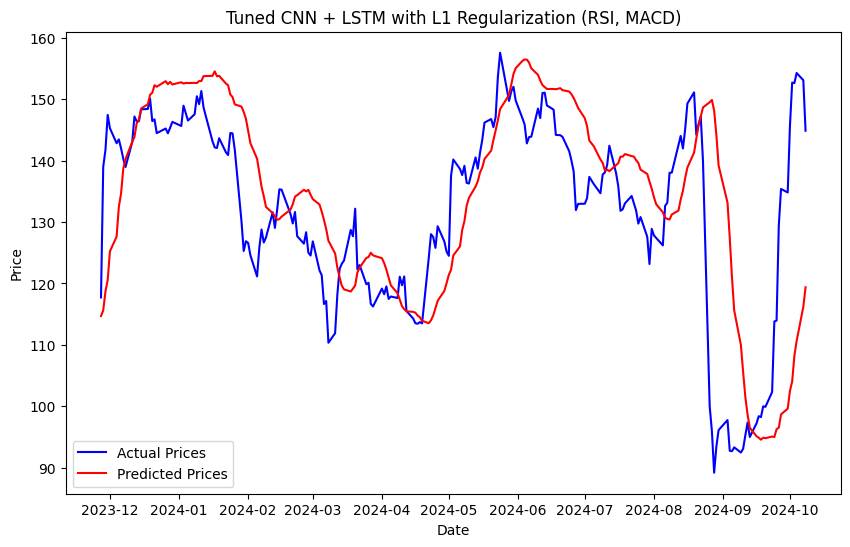

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.regularizers import l1
import matplotlib.pyplot as plt

# Assuming 'df_cleaned' is already preprocessed and available from previous steps

# Calculate RSI with default 14-day window
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate MACD with default window sizes
def macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    return macd_line, signal_line
df=data
# Add default RSI and MACD to the dataset
df['RSI'] = rsi(df)
df['MACD'], df['Signal_Line'] = macd(df)

# Drop NaN values created by RSI and MACD calculations
df.dropna(inplace=True)

# Extract Close, Volume, RSI, MACD, and Signal Line as features
features = df[['Close', 'Volume', 'RSI', 'MACD', 'Signal_Line']]

# Scaling the data (separately for each feature)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Splitting the data into train and test sets
train_size = int(len(scaled_features) * 0.8)
train_data, test_data = scaled_features[:train_size], scaled_features[train_size:]

# Adjust the create_dataset function to handle multiple features
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])  # Include all features
        y.append(data[i, 0])  # The target is the 'Close' price
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape data for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the CNN + LSTM model with L1 regularization (Lasso)
model = Sequential()

#Input a new layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# CNN layer with regularization
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# Max Pooling layer
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer with L1 regularization
model.add(LSTM(units=100, return_sequences=False, kernel_regularizer=l1(0.001)))
model.add(Dropout(0.3))

# Dense layer with L1 regularization
model.add(Dense(units=1, kernel_regularizer=l1(0.001)))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, min_delta = 0.0001)

# Train the model with L1 regularization
#model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=early_stopping, verbose=1)
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 4))], axis=1))[:, 0]  # Only inverse transform the Close price

# Visualize the predictions and actual data
plt.figure(figsize=(10,6))
plt.plot(df.index[train_size + 60:], scaler.inverse_transform(test_data[60:])[:, 0], color='blue', label='Actual Prices')
plt.plot(df.index[train_size + 60:], predictions, color='red', label='Predicted Prices')
plt.title('Tuned CNN + LSTM with L1 Regularization (RSI, MACD)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
